Recently I saw a post on the facebook by one of friend and he challenged me.
<br>
1 = 12
<br>
2 = 21
<br>
3 = 30
<br>
10 = 93
<br>
20 = 183
<br>
80 = 723
<br>
54 = 489
<br>
72 = 651
<br>
90 = 813
<br>
36 = ?

<br>
I was not able to answer the question immediately. 
After a while I found out the input number should be multipled by 9 and add 3 gives the result.
<br>
1 = 1*9 + 3
<br>
90 = 90*9 + 3
<br>
The same way 36 = 36*9 + 3.
<br>
So the final answer is 327
Now I can answer for any number just by writing a simple program.
Wait.. How did I achieve the program logic. Because I am basically smart enough to identify these kind
of solutions(just kidding) so I say this is of my natural intelligence.
From now onwards I can do the calculation for any input number, because I was trained for the above set of
input and output values.
To make my job easy I wrote a program using simple python as mentioned below.

In [3]:
def estimate(x):
    return x*9 + 3

In [4]:
estimate(36)

327

The above logic is so simple(atleast for me), but what if the logic is too complex, 
what if instead of single input if we need to calculate with more inputs to derive the final output.
<br>
Can we identify the function or logic to calculate the output value?
<br>
Can we write a program to identify the logic?
<br>
Can we build a brain that mimics you or me..?
<br>
Why not, we can build one using artificial intelligence that mimics us(you and me).
<br>
So our expected function is f(x) = 9x + 3 or y = 9x + 3

The above task can be achieved by traditional machine learning algorithms. But in this course we will
build a Neural network model.
<br>
Just think of our brain. Our brain contains lot of nuerons and every neuron will process some input 
and provides the output to the next nueron or nuerons. Our brain nuerons or interconnected and responsible 
for processing the input for the actions.

We will use tensor flow to build a model to process the above input. We use tensorflow 2.x version

In [7]:
import tensorflow as tf
import numpy as np

In [ ]:
Define the input and output to train our model. Our tensorflow accepts only the numerical values.
So every input that we provide to the model should be converted to numerical values.

In [8]:
input = np.array([1, 2, 3, 10, 20, 80, 54, 72, 90],  dtype=float)
output = np.array([12, 21, 30, 93, 183, 723, 489, 651, 813],dtype=float)

Now we are ready with input and output values to train our model. 
As a first step we will build a small neural network model to understand how the neural network model works.
Every nueron you define in the model will accept the input and process the output.
For example if a neuron receives an input x it calculates the output as
<br>
a = wx + b where as
<br>
<br>a = output
<br>w = weight
<br>b = bias.
<br>Every input is multiplied by a weight(w) and adds the bias.
These weights and bias will be adjusted as we train our model.

Our model structure is as below.
1. Input, Output Values for training.
2. Layer of single nueron
3. Output

In the first step we define the layer that accepts the input and calculates the output`

In [76]:
layer = tf.keras.layers.Dense(units=1, input_shape=[1])

Add the above defined layer to a model. We define the Sequential Model and add the layer by layer
(if we have any multiple layers)

In [77]:
model = tf.keras.Sequential([layer])

We defined the model with layers. No we need to compile our model and tell it how to validate its output
against the actual output. How to finetune itself, we teach the method to rectify itself.
<br>
Loss function - This tell what is the error(difference) value of each predicted output versus the actual output
<br>
Optimier function - Way to adjust the weights and biases. The minimum adjustment might take more time to train the model or overfitting. The large adjustment values may create low accurate models.
<br>
We will discuss more on these parameters going forward.

In [78]:
model.compile(loss=tf.keras.losses.mean_squared_error,
             optimizer=tf.keras.optimizers.Adam(0.1))

Now we will provide the sample training data and will run the above defined mode to fit the input data.

In [79]:
history = model.fit(input, output, epochs=1500, verbose=False)

Lets plot the loss of our model over the epochs

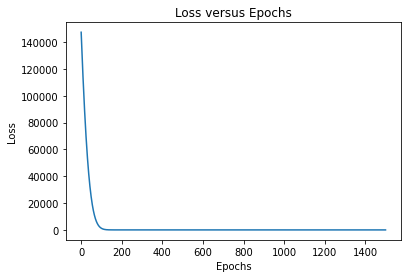

In [80]:
import matplotlib.pyplot as plt
plt.figure()
plt.title("Loss versus Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history['loss'])
plt.show()

From the above plot we can say our model learnt pretty fast upto 125 epochs and after that the loss is almost flat but with consistent difference.
As the epochs increases the loss will decrease. We will discuss on the number of epochs(early stops or finetuning the hyperparamets in the next sessions).

Lets Predict an input which is not part of our training model. 36 is not part of our model training.

In [83]:
model.predict([36])

array([[327.45712]], dtype=float32)

Actual answer is $36 \times 9 +3 = 327$
Looks like our model is doing pretty well.

Like wise we can predict other variables as well

In [90]:
validate_set = [25, 212, 49, 102]

In [91]:
model.predict(validate_set)

array([[ 228.61075],
       [1908.999  ],
       [ 444.27557],
       [ 920.53534]], dtype=float32)

Actual outputs

In [92]:
for val in validate_set:
    print(estimate(val))

228
1911
444
921


As we discussed above we defined the Neural network model with single nueron. Lets print the model summary

In [93]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Here it shows param as 2.
How to calculate the params at each learning layer(will discuss about the learning layers later).
Here it is single neuron it takes only two parameters as weight and bias.
Lets see what are the weights and bias of that single neuron in the layer.

In [98]:
layer.get_weights()

array([3.9599223], dtype=float32)

As you see the above function prints the weights and bias. Here the weight is 8.986033 and bias is 3.9599
<br><br>
The single neuron constructed a function on the input as $8.986033 \times input + 3.9599$
<br><br>
If you observe the above equation it is close to our actual function. Here the bias was not adjusted close to 3 but
we see the function is almost same as our actual function. As it is artificial there is always a chance for the error which can be negotiable at this point of time.

Lets see the visualization of the model using tensorboard

In [119]:
import tensorboard
from datetime import datetime

In [127]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [128]:
model = tf.keras.Sequential([layer])

In [129]:
model.compile(loss=tf.keras.losses.mean_squared_error,
             optimizer=tf.keras.optimizers.Adam(0.1))

In [130]:
model.fit(
    input, output, epochs=1500,
    callbacks=[tensorboard_callback], verbose=False)

In [132]:
%load_ext tensorboard
%tensorboard --logdir {logdir}
